<a href="https://colab.research.google.com/github/feropiso/mat_computacional/blob/main/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Fernando Rodrigo Pinheiro de Sousa

A)
O código define a função de erro SSR(I) e sua derivada e executa o Gradient Descent começando com chute inicial igual a zero. A cada iteração, calcula o gradiente, atualiza o valor do intercept e plota a reta tangente para mostrar o processo de descida. O algoritmo para quando o gradiente fica pequeno, quando a mudança de I é mínima ou quando chega a 50 iterações. No final, ele compara a convergência para dois learning rates: 0.1 e 0.5.

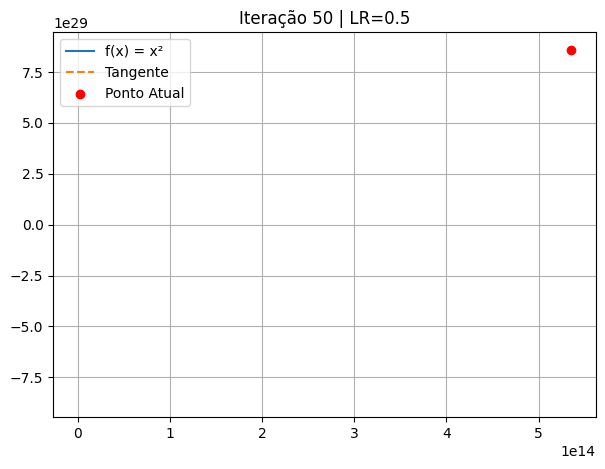

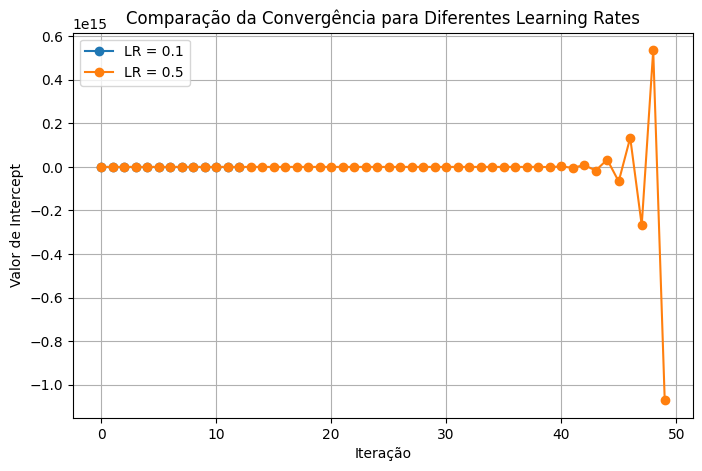

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

'''
Levando-se em consideração a inclinação de 0,64
'''
# Função SSR(I) simplificada
def f(I):
    return (3*I**2) - 5.704*I + 3.15592

# Derivada da função em relação ao Intercept
def df(I):
    return 6*I - 5.704

# Função para Rodar Gradient Descent
def gradient_descent(lr, x0, tol_grad=1e-6, tol_delta=1e-6, max_iter=50):

    '''
    Parâmetros:

    lr: learning rate (tamanho do passo).

    x0: chute inicial para o Intercept

    tol_grad: condição de parada em relação a derivada (|grad| < tol_grad → parar).

    tol_delta: condição de parada para diferença de x (|x_new - x| < tol_delta → parar).

    max_iter: número máximo de iterações (proteção contra loops infinitos).
    '''

    x = x0
    history = []

    print(f"\n==============================")
    print(f"   LEARNING RATE = {lr}")
    print(f"==============================\n")

    for i in range(max_iter):
        #calcula a derivada (gradiente) no ponto atual.
        grad = df(x)
        #Tamanho do passo efetivo
        step = lr * grad
        #Atualize o valor de x dando um passo na direção que reduz o valor da função.
        x_new = x - step

        # Armazena histórico
        history.append(x_new)

        # ---- Impressão ----
        print(f"Iteração {i+1}")
        print(f"  Step Size     : {step:.6f}")
        print(f"  Old Intercept : {x:.6f}")
        print(f"  New Intercept : {x_new:.6f}")
        print("---------------------------------------")

        # ---- Plot da reta tangente ----
        clear_output(wait=True)
        xs = np.linspace(-4, 4, 200)
        ys = f(xs)

        # reta tangente
        tangent = f(x) + df(x) * (xs - x)

        plt.figure(figsize=(7, 5))
        plt.plot(xs, ys, label="f(x) = x²")
        plt.plot(xs, tangent, "--", label="Tangente")
        plt.scatter([x], [f(x)], color='red', label="Ponto Atual")
        plt.title(f"Iteração {i+1} | LR={lr}")
        plt.legend()
        plt.grid(True)
        plt.show()

        time.sleep(0.4)

        # ---- Condições de parada ----
        if abs(grad) < tol_grad:
            print("\nParou por gradiente pequeno.")
            break

        if abs(x_new - x) < tol_delta:
            print("\nParou por variação pequena de x.")
            break

        if abs(f(x_new) - f(x)) < 1e-9:
            print("\nParou porque a função parou de diminuir.")
            break

        x = x_new

    return history


# Executando para duas Learning Rates
lr_list = [0.1, 0.5]
results = {}

for lr in lr_list:
    results[lr] = gradient_descent(lr, x0=0)


plt.figure(figsize=(8,5))
for lr, hist in results.items():
    plt.plot(hist, marker="o", label=f"LR = {lr}")

plt.title("Comparação da Convergência para Diferentes Learning Rates")
plt.xlabel("Iteração")
plt.ylabel("Valor de Intercept")
plt.grid(True)
plt.legend()
plt.show()




Para learning rate = 0.1, o método de Gradient Descent apresenta um comportamento estável e converge rapidamente para o mínimo da função. Observando as iterações, o valor de x se aproxima do ponto ótimo por volta da 16ª iteração, momento em que o gradiente já é praticamente zero e não há mais variação significativa.

Por outro lado, quando usamos um learning rate cinco vezes maior (0.5), o passo dado a cada iteração se torna grande demais. Isso faz com que o algoritmo “pule” o mínimo e comece a oscilar cada vez mais longe do ponto ideal. O resultado é uma divergência rápida

B) O código implementa o método de gradient descent para encontrar os valores de intercept e slope. A cada iteração, ele calcula o valor da derivada de cada função, atualiza ambos usando a learning rate e imprime informações sobre o passo, mostrando o valor antigo e o novo intercept. O processo continua até que uma das duas condições de parada seja atingida: ou o gradiente fica muito pequeno (indicando convergência), ou a mudança nos parâmetros se torna irrelevante. O método é executado duas vezes, cada uma com uma learning rate diferente, permitindo comparar velocidades de convergência.



In [ ]:
# Dados do problema (x e y reais do slide)
x = [0.5, 2.3, 2.9]
y = [1.4, 1.9, 3.2]


def grad_intercept(b0, b1):
    """
    d(SSE)/d(intercept)
    """
    g = 0
    for xi, yi in zip(x, y):
        g += -2 * (yi - (b0 + b1 * xi))
    return g


def grad_slope(b0, b1):
    """
    d(SSE)/d(slope)
    """
    g = 0
    for xi, yi in zip(x, y):
        g += -2 * xi * (yi - (b0 + b1 * xi))
    return g


def gradient_descent(lr, max_iter=1000, tol=1e-6):
    """
    Executa Gradient Descent simultaneamente para intercept e slope.
    """
    b0 = 0.0  # intercept inicial
    b1 = 0.0  # slope inicial

    print(f"\n=========== RODANDO COM LEARNING RATE = {lr} ===========\n")

    for i in range(max_iter):

        g0 = grad_intercept(b0, b1)
        g1 = grad_slope(b0, b1)

        step_b0 = lr * g0
        step_b1 = lr * g1

        new_b0 = b0 - step_b0
        new_b1 = b1 - step_b1

        print(f"Iter {i+1:03d} | Step={step_b0:.6f} | Old b0={b0:.6f} | New b0={new_b0:.6f}")

        # Condição de parada por convergência do intercept
        if abs(step_b0) < tol:
            print("\n*** Convergiu pelo tamanho do passo do intercept! ***\n")
            break

        b0, b1 = new_b0, new_b1

    return b0, b1

# TESTANDO COM DUAS LEARNING RATES
b0_1, b1_1 = gradient_descent(lr=0.01)
b0_2, b1_2 = gradient_descent(lr=0.001)

print("\n======= RESULTADOS FINAIS =======")
print(f"LR=0.01  -> intercept={b0_1:.6f}, slope={b1_1:.6f}")
print(f"LR=0.001 -> intercept={b0_2:.6f}, slope={b1_2:.6f}")



=========== RODANDO COM LEARNING RATE = 0.01 ===========

Iter 001 | Step=-0.130000 | Old b0=0.000000 | New b0=0.130000
Iter 002 | Step=-0.089482 | Old b0=0.130000 | New b0=0.219482
Iter 003 | Step=-0.062213 | Old b0=0.219482 | New b0=0.281695
Iter 004 | Step=-0.043853 | Old b0=0.281695 | New b0=0.325548
Iter 005 | Step=-0.031484 | Old b0=0.325548 | New b0=0.357032
Iter 006 | Step=-0.023144 | Old b0=0.357032 | New b0=0.380176
Iter 007 | Step=-0.017514 | Old b0=0.380176 | New b0=0.397690
Iter 008 | Step=-0.013705 | Old b0=0.397690 | New b0=0.411395
Iter 009 | Step=-0.011122 | Old b0=0.411395 | New b0=0.422517
Iter 010 | Step=-0.009363 | Old b0=0.422517 | New b0=0.431880
Iter 011 | Step=-0.008159 | Old b0=0.431880 | New b0=0.440040
Iter 012 | Step=-0.007328 | Old b0=0.440040 | New b0=0.447368
Iter 013 | Step=-0.006749 | Old b0=0.447368 | New b0=0.454117
Iter 014 | Step=-0.006338 | Old b0=0.454117 | New b0=0.460454
Iter 015 | Step=-0.006041 | Old b0=0.460454 | New b0=0.466496
Iter 016 | 

Os resultados mostram o impacto da learning rate na velocidade e na precisão da convergência. Com LR = 0.01, o algoritmo atingiu o ponto de mínimo mais rapidamente, precisando de 766 iterações, e chegou a valores de intercept e slope mais próximos do ótimo esperado (0.9486 e 0.6411). Já com LR = 0.001, a convergência foi muito mais lenta — o algoritmo precisou de 1000 iterações, atingindo o limite máximo definido — e ainda assim parou em valores menos precisos (0.7665 e 0.7187). Assim, a comparação evidencia que learning rates muito pequenas tornam o processo lento e ineficiente, enquanto taxas moderadas aceleram a convergência sem causar instabilidade.

C) O código começa definindo os dados
𝑋
X e
𝑦
y, além das funções de gradiente para intercept e slope, que calculam as derivadas da função de erro para cada amostra. Em seguida, a função train() implementa três variações do gradiente descendente: batch, stochastic (SGD) e mini-batch. Dependendo do método escolhido, a função seleciona todos os dados (batch), apenas um dado aleatório (SGD) ou um subconjunto aleatório de tamanho definido (mini-batch). Para cada iteração, ela calcula os gradientes médios do conjunto escolhido, atualiza intercept e slope usando a learning rate, e verifica uma condição de parada baseada na mudança mínima desses parâmetros. Caso a mudança seja muito pequena, o algoritmo considera que convergiu. Por fim, após executar os três métodos, o código imprime os valores finais encontrados para intercept, slope e o número de iterações necessárias. Dessa forma, o programa permite comparar diretamente como cada técnica atualiza os parâmetros, como se comportam em termos de estabilidade e velocidade de convergência, e como o tamanho do batch influencia o resultado final.

In [ ]:
import numpy as np
# Dados
X = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

# Funções de gradiente
def grad_intercept(x, y, intercept, slope):
    return -2 * (y - (intercept + slope * x))

def grad_slope(x, y, intercept, slope):
    return -2 * x * (y - (intercept + slope * x))

def StochasticGradientDescent(method, lr=0.01, batch_size=None, max_iter=1000, tol=1e-6):
    intercept = 0.0
    slope = 0.0

    n = len(X)

    for i in range(max_iter):

        if method == "batch":
            # usa todos os samples
            xs, ys = X, y

        elif method == "sgd":
            # escolhe um único sample aleatório
            idx = np.random.randint(0, n)
            xs, ys = np.array([X[idx]]), np.array([y[idx]])

        elif method == "mini-batch":
            # escolhe batch aleatório
            idxs = np.random.choice(n, batch_size, replace=False)
            xs, ys = X[idxs], y[idxs]

        # calcula gradientes médios
        g_inter = np.mean(grad_intercept(xs, ys, intercept, slope))
        g_slope = np.mean(grad_slope(xs, ys, intercept, slope))

        # atualiza
        new_intercept = intercept - lr * g_inter
        new_slope = slope - lr * g_slope

        # condição de parada
        if abs(new_intercept - intercept) < tol and abs(new_slope - slope) < tol:
            return new_intercept, new_slope, i+1

        intercept, slope = new_intercept, new_slope

    return intercept, slope, max_iter


# EXECUTANDO OS TRÊS MÉTODOS
batch_result   = StochasticGradientDescent("batch", lr=0.01)
sgd_result     = StochasticGradientDescent("sgd", lr=0.01)
mini_result    = StochasticGradientDescent("mini-batch", lr=0.01, batch_size=2)

print("======== RESULTADOS ========")
print(f"Batch Gradient Descent      -> intercept={batch_result[0]:.6f}, slope={batch_result[1]:.6f}, iterações={batch_result[2]}")
print(f"Stochastic GD (SGD)         -> intercept={sgd_result[0]:.6f}, slope={sgd_result[1]:.6f}, iterações={sgd_result[2]}")
print(f"Mini-Batch (batch=2)        -> intercept={mini_result[0]:.6f}, slope={mini_result[1]:.6f}, iterações={mini_result[2]}")


======== RESULTADOS ========
Batch Gradient Descent      -> intercept=0.936144, slope=0.646383, iterações=1000
Stochastic GD (SGD)         -> intercept=0.912866, slope=0.630500, iterações=1000
Mini-Batch (batch=2)        -> intercept=0.925409, slope=0.625643, iterações=1000


A comparação mostra como o modo de cálculo do gradiente influencia o caminho até a solução. O Batch Gradient Descent usa todos os pontos de uma vez, produzindo uma trajetória suave e estável, por isso tende a convergir para valores mais próximos do ótimo teórico, embora possa ser mais lento por iteração. O SGD, ao atualizar os parâmetros a cada amostra individual, introduz erros no processo: ele oscila bastante, converge mais rápido em termos de tempo, mas chega a uma solução um pouco menos precisa. Já o Mini-Batch (tamanho 2) equilibra os dois extremos — reduz o erro em relação ao SGD, mas ainda é mais rápido e mais flexível que o batch completo. Como resultado, os valores finais ficam entre os dois métodos.

D) O código implementa uma pequena rede neural com uma única camada oculta e executa manualmente o gradiente descendente, mostrando a atualização do viés b₃ a cada iteração. Primeiro, ele define a arquitetura (pesos, funções de ativação e forward pass), depois calcula o erro e os gradientes por meio do backpropagation. Em seguida, dentro de um loop de treinamento, o algoritmo registra o step size (taxa de aprendizado multiplicada pelo gradiente), o valor antigo de b₃ e o novo valor após a atualização, repetindo isso até a condição de parada ser atingida (erro mínimo ou número máximo de iterações). Dessa forma, o código deixa explícito como o gradiente descendente ajusta os parâmetros da rede, permitindo observar numericamente o processo de convergência.

In [ ]:
import numpy as np

# ---------------------------
# PARÂMETROS DA REDE
# ---------------------------

# Pesos da entrada → hidden
w1 = 3.34
w2 = -3.53

# Bias da hidden
b1 = -1.43
b2 = 0.57

# Pesos hidden → saída
v1 = -1.22
v2 = -2.30

# Bias da saída (b3) — este será otimizado!
b3 = 2.61

# Função de ativação usada na imagem (curva genérica)
# Vou usar sigmoid como padrão
def activation(x):
    return 1 / (1 + np.exp(-x))

# Derivada da função de ativação
def activation_deriv(x):
    a = activation(x)
    return a * (1 - a)

# ---------------------------
# Forward pass da rede
# ---------------------------
def forward(x, b3):
    h1 = activation(w1 * x + b1)
    h2 = activation(w2 * x + b2)
    y = v1 * h1 + v2 * h2 + b3
    return y, h1, h2

# ---------------------------
# Cálculo da perda (MSE)
# ---------------------------
def mse(y_true, y_pred):
    return (y_true - y_pred) ** 2

# ---------------------------
# Derivada da perda em relação a b3
# d(MSE)/db3 = -2 (y_true - y_pred)
# ---------------------------
def grad_b3(x, y_true, b3):
    y_pred, _, _ = forward(x, b3)
    return -2 * (y_true - y_pred)


# =====================================================
# GRADIENTE DESCENDENTE PARA APRENDER b3
# =====================================================

x = 1.0      # entrada arbitrária
y_true = 1.0 # saída desejada (yes)

lr = 0.05
tol = 1e-6
max_iter = 2000

print("==== INICIANDO TREINAMENTO DO b3 ====\n")

for it in range(max_iter):

    old_b3 = b3

    g = grad_b3(x, y_true, b3)
    step = lr * g

    b3 = b3 - step

    print(f"Iter {it:4d} | Step={step:.6f} | Old b3={old_b3:.6f} | New b3={b3:.6f}")

    # condições de parada
    if abs(step) < tol:
        print("\n>>> Convergiu: step menor que tolerância.")
        break

print("\n======= RESULTADO FINAL =======")
print(f"b3 final = {b3:.6f}")
print(f"iterações = {it+1}")


==== INICIANDO TREINAMENTO DO b3 ====

Iter    0 | Step=0.043404 | Old b3=2.610000 | New b3=2.566596
Iter    1 | Step=0.039064 | Old b3=2.566596 | New b3=2.527531
Iter    2 | Step=0.035158 | Old b3=2.527531 | New b3=2.492374
Iter    3 | Step=0.031642 | Old b3=2.492374 | New b3=2.460732
Iter    4 | Step=0.028478 | Old b3=2.460732 | New b3=2.432254
Iter    5 | Step=0.025630 | Old b3=2.432254 | New b3=2.406624
Iter    6 | Step=0.023067 | Old b3=2.406624 | New b3=2.383557
Iter    7 | Step=0.020760 | Old b3=2.383557 | New b3=2.362797
Iter    8 | Step=0.018684 | Old b3=2.362797 | New b3=2.344113
Iter    9 | Step=0.016816 | Old b3=2.344113 | New b3=2.327297
Iter   10 | Step=0.015134 | Old b3=2.327297 | New b3=2.312163
Iter   11 | Step=0.013621 | Old b3=2.312163 | New b3=2.298542
Iter   12 | Step=0.012259 | Old b3=2.298542 | New b3=2.286284
Iter   13 | Step=0.011033 | Old b3=2.286284 | New b3=2.275251
Iter   14 | Step=0.009930 | Old b3=2.275251 | New b3=2.265321
Iter   15 | Step=0.008937 | Old

E) Este código implementa o treinamento em lote (batch) de uma rede neural simples para otimizar o parâmetro de bias b3 da camada de saída, utilizando o gradiente descendente para minimizar a Soma dos Resíduos Quadrados (SSR). A rede processa simultaneamente três exemplos de entrada (dosagens 0.6, 0.5 e 0.55 com saídas desejadas correspondentes 1, 0 e 0), calcula o gradiente médio sobre todos os pontos a cada iteração e atualiza b3 de forma a reduzir progressivamente o erro de predição, demonstrando um fluxo completo de aprendizado supervisionado com múltiplas amostras.

In [ ]:
import numpy as np

# ---------------------------
# PARÂMETROS DA REDE
# ---------------------------

# Pesos da entrada → hidden
w1 = 3.34
w2 = -3.53

# Bias da hidden
b1 = -1.43
b2 = 0.57

# Pesos hidden → saída
v1 = -1.22
v2 = -2.30

# Bias da saída inicial
b3 = 2.61

# Função de ativação sigmoid
def activation(x):
    return 1 / (1 + np.exp(-x))

# ---------------------------
# DADOS DE TREINAMENTO (da imagem)
# ---------------------------

X = np.array([0, 0.5, 1])  # Dosagens
Y_true = np.array([1.0, 0.0, 0.0])  # Yes=1, No=0

print("Dados de treinamento:")
for i in range(len(X)):
    print(f"  Ponto {i+1}: Dosagem={X[i]:.2f}, Saída desejada={Y_true[i]:.0f} ({'Yes' if Y_true[i]==1 else 'No'})")
print()

# ---------------------------
# Forward pass para um ponto
# ---------------------------
def forward_single(x, b3_current):
    h1 = activation(w1 * x + b1)
    h2 = activation(w2 * x + b2)
    y_pred = v1 * h1 + v2 * h2 + b3_current
    return y_pred, h1, h2

# ---------------------------
# Forward pass para todos os pontos (batch)
# ---------------------------
def forward_batch(X_data, b3_current):
    predictions = []
    for x in X_data:
        y_pred, _, _ = forward_single(x, b3_current)
        predictions.append(y_pred)
    return np.array(predictions)

# ---------------------------
# Cálculo do SSR (Soma dos Resíduos Quadrados)
# ---------------------------
def ssr(Y_true, Y_pred):
    return np.sum((Y_true - Y_pred) ** 2)

# ---------------------------
# Gradiente do SSR em relação a b3 (para batch)
# Baseado na imagem: dSSR/db3 = Σ -2 × (Y_true - Y_pred) × 1
# Como dy/db3 = 1 para cada predição
# ---------------------------
def grad_b3_batch(X_data, Y_true_data, b3_current):
    total_grad = 0
    for i in range(len(X_data)):
        x = X_data[i]
        y_true = Y_true_data[i]
        y_pred, _, _ = forward_single(x, b3_current)
        # Derivada para este ponto: -2 × (y_true - y_pred) × 1
        grad_point = -2 * (y_true - y_pred)
        total_grad += grad_point

    # Média do gradiente (gradiente do batch)
    return total_grad / len(X_data)

# ---------------------------
# Gradiente descendente para aprender b3 com batch
# ---------------------------
lr = 0.1  # Taxa de aprendizado maior para convergência mais rápida
tol = 1e-6
max_iter = 2000

print("==== INICIANDO TREINAMENTO DO b3 (BATCH) ====\n")
print("Configuração:")
print(f"  Número de pontos: {len(X)}")
print(f"  Taxa de aprendizado: {lr}")
print(f"  Tolerância: {tol}")
print()

b3_current = b3  # Começa com o valor inicial
history = []  # Para armazenar histórico

for it in range(max_iter):
    old_b3 = b3_current

    # Calcula predições atuais
    Y_pred = forward_batch(X, b3_current)

    # Calcula gradiente do batch
    g = grad_b3_batch(X, Y_true, b3_current)

    # Atualiza b3
    b3_current = b3_current - lr * g

    # Calcula SSR atual
    current_ssr = ssr(Y_true, Y_pred)

    history.append({
        'iteration': it,
        'b3': b3_current,
        'gradient': g,
        'ssr': current_ssr,
        'step': lr * g
    })

    # Imprime progresso a cada 100 iterações
    if it % 100 == 0 or it < 5:
        print(f"Iter {it:4d} | b3={b3_current:.6f} | Grad={g:.6f} | SSR={current_ssr:.6f}")

    # Condição de parada
    if abs(lr * g) < tol:
        print(f"\n>>> Convergiu na iteração {it}: passo menor que tolerância.")
        break

print("\n" + "="*50)
print("RESULTADO FINAL")
print("="*50)

# Resultados finais
Y_pred_final = forward_batch(X, b3_current)
final_ssr = ssr(Y_true, Y_pred_final)

print(f"b3 inicial: {b3:.6f}")
print(f"b3 final:   {b3_current:.6f}")
print(f"Iterações:  {it+1}")
print(f"SSR final:  {final_ssr:.6f}")
print()

print("Predições finais:")
print("-" * 40)
print(f"{'Dosagem':<10} {'Verdadeiro':<12} {'Previsto':<12} {'Erro':<10}")
print("-" * 40)
for i in range(len(X)):
    erro = Y_true[i] - Y_pred_final[i]
    print(f"{X[i]:<10.2f} {Y_true[i]:<12.2f} {Y_pred_final[i]:<12.6f} {erro:<10.6f}")

print("\n" + "="*50)
print("GRADIENTE PARA CADA PONTO (final):")
print("="*50)
for i in range(len(X)):
    x = X[i]
    y_true = Y_true[i]
    y_pred, _, _ = forward_single(x, b3_current)
    grad_point = -2 * (y_true - y_pred)
    print(f"Ponto {i+1} (x={x:.2f}, y_true={y_true:.1f}):")
    print(f"  Predição: {y_pred:.6f}")
    print(f"  Erro: {y_true - y_pred:.6f}")
    print(f"  Gradiente: -2 × ({y_true:.1f} - {y_pred:.6f}) = {grad_point:.6f}")
    print()

# ---------------------------
# Visualização da convergência
# ---------------------------
print("\n" + "="*50)
print("ANÁLISE DA CONVERGÊNCIA")
print("="*50)
print(f"Passo final: {abs(lr * history[-1]['gradient']):.10f}")
print(f"Redução no SSR: {(history[0]['ssr'] - final_ssr):.6f} ({((history[0]['ssr'] - final_ssr)/history[0]['ssr']*100):.1f}%)")

Dados de treinamento:
  Ponto 1: Dosagem=0.00, Saída desejada=1 (Yes)
  Ponto 2: Dosagem=0.50, Saída desejada=0 (No)
  Ponto 3: Dosagem=1.00, Saída desejada=0 (No)

==== INICIANDO TREINAMENTO DO b3 (BATCH) ====

Configuração:
  Número de pontos: 3
  Taxa de aprendizado: 0.1
  Tolerância: 1e-06

Iter    0 | b3=2.427866 | Grad=1.821345 | SSR=4.005094
Iter    1 | b3=2.282158 | Grad=1.457076 | SSR=3.109424
Iter    2 | b3=2.165592 | Grad=1.165661 | SSR=2.536196
Iter    3 | b3=2.072339 | Grad=0.932528 | SSR=2.169329
Iter    4 | b3=1.997737 | Grad=0.746023 | SSR=1.934535

>>> Convergiu na iteração 55: passo menor que tolerância.

RESULTADO FINAL
b3 inicial: 2.610000
b3 final:   1.699331
Iterações:  56
SSR final:  1.517122

Predições finais:
----------------------------------------
Dosagem    Verdadeiro   Previsto     Erro      
----------------------------------------
0.00       1.00         -0.005405    1.005405  
0.50       0.00         0.482039     -0.482039 
1.00       0.00         0.5233